# Criptoaritmética

Se propone la suma de la imagen siguiente:

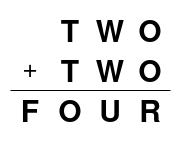

Cada letra representa un dígito del sistema de numeración decimal.

Encuentra los valores, tales que:

- Una letra y un dígito estén asociados de manera biunívoca.
- Los "números" *TWO* y *FOUR* no tengan ceros a la izquierda.
- El sistema sea consistente al realizar la operación suma.

Para este problema tenemos a las variables *T*, *W*, *O*, *F*, *U* y *R*, las cuales son planteadas por el propio problema y cuyo dominio son los dígitos del 0 al 9, exceptuando el 0 para las variables *T* y *F*. Esta restricción se agrega debido a que se busca que los números representados en el problema no tengan ceros a la izquierda.

Además se consideran las variables *X*, *Y* y *Z*, las cuales servirán como variables auxiliares para la representación del acarreo. Esto surge como una alternativa para representar el funcionamiento algorítmico de la suma.

Esto lo podemos ver de mejor manera en la siguiente imagen:

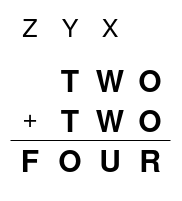

Con esto en mente podemos empezar a definir las variables para el algoritmo

## Definición de variables

Importamos las librerias necesarias

In [206]:
from itertools import product
from collections import deque

Definimos la clase *Variable* y asignamos su dominio de acuerdo a lo establecido previamente

In [207]:
class Variable:
    def __init__(self, id_, domain):
        self.id = id_
        self.domain = domain
    def __str__(self):
        return f'{self.id} -> {self.domain}'

In [208]:
values = [
    ['T', [1,2,3,4,5,6,7,8,9]],
    ['W', [0,1,2,3,4,5,6,7,8,9]],
    ['O', [0,1,2,3,4,5,6,7,8,9]],
    ['F', [1,2,3,4,5,6,7,8,9]],
    ['U', [0,1,2,3,4,5,6,7,8,9]],
    ['R', [0,1,2,3,4,5,6,7,8,9]],
    ['X', [0,1]],
    ['Y', [0,1]],
    ['Z', [0,1]],
]

In [209]:
variables = {}
for item in values:
    variables[item[0]] = Variable(*item)

In [210]:
for v in variables:
    print(f'{variables[v].id} -> {variables[v].domain}')

T -> [1, 2, 3, 4, 5, 6, 7, 8, 9]
W -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
O -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
F -> [1, 2, 3, 4, 5, 6, 7, 8, 9]
U -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
R -> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X -> [0, 1]
Y -> [0, 1]
Z -> [0, 1]


## Definición de restricciones

Para las restricciones, estas se pueden obtener a partir de la suma propuesta. En este caso se sugieren las siguientes:

- $ C1: \enspace     O + O = 10X + R $
- $ C2: \enspace X + W + W = 10Y + U $
- $ C3: \enspace Y + T + T = 10Z + O $
- $ C4: \enspace         Z =   F     $

Además tenemos que recordar que cada letra está asignada a un dígito, por lo tanto no puede haber dos letras con el mismo digito asociado. Esta restricción no afecta a las variables *X*, *Y*, *Z* ya que estás sólo son usadas como letras auxiliares. Por lo tanto agregaremos otra restricción que nos defina esta propiedad

- $ C5: \enspace         T \ne W\ne O \ne F \ne  U \ne R     $

In [211]:
def c1(O, X, R):
    if O + O == (10*X) + R:
        return True
    else:
        return False
    
def c2(X, W, Y, U):
    if X + W + W == (10*Y) + U:
        return True
    else:
        return False
    
def c3(Y, T, Z, O):
    if Y + T + T == (10*Z) + O:
        return True
    else:
        return False
    
def c4(Z, F):
    if Z == F:
        return True
    else:
        return False
    
def c5(T,W,O,F,U,R):
    if len([T,W,O,F,U,R]) == len(set([T,W,O,F,U,R])):
        return True
    else:
        return False
    

Definimos la clase *Constrain* y hacemos instancias de cada restricción

In [212]:
class Constrain:
    def __init__(self, id_, rel_variables, func):
        self.id = id_
        self.related_variables = rel_variables
        self.function = func

In [213]:
constraints_values = [ ['C1', ['O','X','R' ], c1],
                       ['C2', ['X', 'W', 'Y', 'U' ], c2],
                       ['C3', ['Y', 'T', 'Z', 'O' ], c3],
                       ['C4', ['Z', 'F' ], c4],
                       ['C5', ['T','W','O','F','U','R'], c5],
                     ]

In [214]:
constrains = {}
for item in constraints_values:
    constrains[item[0]] = Constrain(*item)

## Reducción de dominio

Creamos todas las aristas *(X, C)* para todas las variables y restricciones

In [215]:
edges = []
for key in constrains:
    for var in constrains[key].related_variables:
        if (var, key) not in edges:
            edges.append((var, key))

Realizamos el algoritmo AC-3 para la consistencia de arco

In [216]:
edges_deque = deque(edges)
while(edges_deque):
    variable_name, constraint_name = edges_deque.popleft()
    for value in list(variables[variable_name].domain):
        valid = False
        for combination in product(*[variables[v].domain if v != variable_name else [value] for v in constrains[constraint_name].related_variables]):
            if constrains[constraint_name].function(*combination):
                valid = True
                break
        if not valid:            
            variables[variable_name].domain.remove(value)
            related_cons = [constrain for variable, constrain in edges if variable == variable_name]
            affected_edges = [(v, c) for v, c in edges if c in related_cons and v != variable_name]
            edges_deque += deque(affected_edges)


Analizamos los resultados después de la reducción de dominio después del algoritmo

In [217]:
for v in variables:
    print(f'{variables[v].id} -> {variables[v].domain}')

T -> [5, 6, 7, 8, 9]
W -> [0, 2, 3, 4, 5, 6, 7, 8, 9]
O -> [0, 2, 3, 4, 5, 6, 7, 8, 9]
F -> [1]
U -> [0, 2, 3, 4, 5, 6, 7, 8, 9]
R -> [0, 2, 4, 6, 8]
X -> [0, 1]
Y -> [0, 1]
Z -> [1]


## Búsqueda

Ya que tenemos un dominio más reducidio y un espacio de búsqueda más pequeño, tenemos que buscar la solución o soluciones al problema. Esta búsqueda se puede realizar de diferentes formas, a continuación muestro la forma más simple sólo para ejemplificar. En este caso sólo evaluamos las diversas asignaciones de valores para estas variables y evaluamos si estas cumplen con todas las restricciones a la vez.

In [218]:
solutions = []
for combination in product(*[variables[v].domain for v in [x for x in variables]]):
        dict_values = dict(zip([v for v in variables], combination))
        if c1(dict_values['O'], dict_values['X'], dict_values['R']):
            if c2(dict_values['X'], dict_values['W'], dict_values['Y'], dict_values['U']):
                if c3(dict_values['Y'], dict_values['T'], dict_values['Z'], dict_values['O']):
                    if c4(dict_values['Z'], dict_values['F']):
                        if c5(dict_values['T'], dict_values['W'], dict_values['O'], dict_values['F'],  dict_values['U'],  dict_values['R']):
                            solutions.append(dict_values)

In [219]:
solutions

[{'T': 7, 'W': 3, 'O': 4, 'F': 1, 'U': 6, 'R': 8, 'X': 0, 'Y': 0, 'Z': 1},
 {'T': 7, 'W': 6, 'O': 5, 'F': 1, 'U': 3, 'R': 0, 'X': 1, 'Y': 1, 'Z': 1},
 {'T': 8, 'W': 3, 'O': 6, 'F': 1, 'U': 7, 'R': 2, 'X': 1, 'Y': 0, 'Z': 1},
 {'T': 8, 'W': 4, 'O': 6, 'F': 1, 'U': 9, 'R': 2, 'X': 1, 'Y': 0, 'Z': 1},
 {'T': 8, 'W': 6, 'O': 7, 'F': 1, 'U': 3, 'R': 4, 'X': 1, 'Y': 1, 'Z': 1},
 {'T': 9, 'W': 2, 'O': 8, 'F': 1, 'U': 5, 'R': 6, 'X': 1, 'Y': 0, 'Z': 1},
 {'T': 9, 'W': 3, 'O': 8, 'F': 1, 'U': 7, 'R': 6, 'X': 1, 'Y': 0, 'Z': 1}]

De esta forma podemos obtener todas las soluciones. Finalmente se define una función para imprimir de mejor forma los resultados

In [220]:
def answer_print_format(selected_values):
    two  =                             100*selected_values['T'] + 10*selected_values['W'] + selected_values['O']
    four = 1000*selected_values['F'] + 100*selected_values['O'] + 10*selected_values['U'] + selected_values['R']
    print( "TWO = {} \t FOUR = {}".format(two,four) )

In [221]:
for solution in solutions:
    answer_print_format(solution)

TWO = 734 	 FOUR = 1468
TWO = 765 	 FOUR = 1530
TWO = 836 	 FOUR = 1672
TWO = 846 	 FOUR = 1692
TWO = 867 	 FOUR = 1734
TWO = 928 	 FOUR = 1856
TWO = 938 	 FOUR = 1876
